In [3]:
import numpy as np
import pandas as pd
import json
from tqdm import tqdm
import matplotlib.pyplot as plt
import random


# Create Ratings Dataframe

In [2]:
line_count = len(open("yelp_dataset/review.json").readlines())
review_id, user_ids, business_ids, stars, dates, useful, funny, cool, text = [], [], [], [], [], [], [], [], []
with open("yelp_dataset/review.json") as f:
    for line in tqdm(f, total=line_count):
        blob = json.loads(line)
        review_id+=[blob["review_id"]]
        user_ids += [blob["user_id"]]
        business_ids += [blob["business_id"]]
        stars += [blob["stars"]]
        useful+= [blob["useful"]]
        dates += [blob["date"]]
        funny += [blob["funny"]]
        cool += [blob["cool"]]
        text += [blob["text"]]
ratings = pd.DataFrame(
    {"user_id": user_ids, "business_id": business_ids,"review_id":review_id, "rating": stars, "date": dates,"useful":useful,
    "funny":funny,"cool":cool,"text":text})
ratings.to_csv('ratings.csv')

In [4]:
ratings=pd.read_csv('ratings.csv')
ratings.head()

/home/darshan/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,user_id,business_id,review_id,rating,date,useful,funny,cool,text
0,0,hG7b0MtEbXx5QzbzE6C_VA,ujmEBvifdJM6h6RLv4wQIg,Q1sbwvVQXV2734tPgoKj4Q,1.0,2013-05-07 04:34:36,6.0,1.0,0.0,Total bill for this horrible service? Over $8G...
1,1,yXQM5uF2jS6es16SJzNHfg,NZnhc2sEQy3RmzKTZnqtwQ,GJXCdrto3ASJOqKeVWPi6Q,5.0,2017-01-14 21:30:33,0.0,0.0,0.0,I *adore* Travis at the Hard Rock's new Kelly ...
2,2,n6-Gk65cPZL6Uz8qRm3NYw,WTqjgwHlXbSFevF32_DJVw,2TzJjDVDEuAW6MR5Vuc1ug,5.0,2016-11-09 20:09:03,3.0,0.0,0.0,I have to say that this office really has it t...
3,3,dacAIZ6fTM6mqwW5uxkskg,ikCg8xy5JIg_NGPx-MSIDA,yi0R0Ugj_xUx_Nek0-_Qig,5.0,2018-01-09 20:56:38,0.0,0.0,0.0,Went in for a lunch. Steak sandwich was delici...
4,4,ssoyf2_x0EQMed6fgHeMyQ,b1b1eb3uo-w561D0ZfCEiQ,11a8sVPMUFtaC7_ABRkmtw,1.0,2018-01-30 23:07:38,7.0,0.0,0.0,Today was my second out of three sessions I ha...


In [5]:
len(ratings)

6685902

In [6]:
len(ratings.user_id.unique())

1637139

In [7]:
len(ratings.business_id.unique())

192607

In [8]:
ratings.columns

Index(['Unnamed: 0', 'user_id', 'business_id', 'review_id', 'rating', 'date',
       'useful', 'funny', 'cool', 'text'],
      dtype='object')

# Distribution of Ratings in ratings data


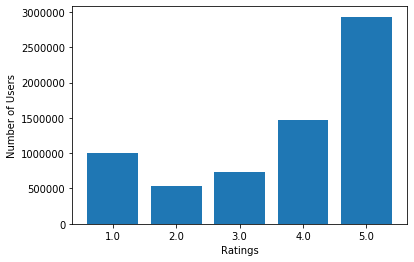

In [13]:
x=ratings['rating'].value_counts().rename_axis('ratings').reset_index(name='UserCount').sort_values(by=['ratings'])
plt.bar([i for i in range(5)], x['UserCount'])
plt.xticks([i for i in range(5)],x['ratings'])
plt.xlabel("Ratings")
plt.ylabel("Number of Users")
plt.show()



# Create business dataframe

In [7]:
line_count = len(open("yelp_dataset/business.json").readlines())

business_id, name ,address,city ,state,postal_code ,latitude ,longitude ,stars ,review_count ,is_open,attributes ,categories =[],[],[],[],[],[],[],[],[],[],[],[],[]

with open("yelp_dataset/business.json") as f:
    for line in tqdm(f, total=line_count):
        blob = json.loads(line)
        business_id+=[blob["business_id"]]
        name += [blob["name"]]
        address += [blob["address"]]
        city += [blob["city"]]
        state+= [blob["state"]]
        postal_code += [blob["postal_code"]]
        latitude += [blob["latitude"]]
        longitude += [blob["longitude"]]
        stars += [blob["stars"]]
        review_count += [blob["review_count"]]
        is_open += [blob["is_open"]]
        attributes += [blob["attributes"]]
        categories += [blob["categories"]]
business = pd.DataFrame(
    {"business_id":business_id, "name":name,
         "address":address,"city":city,"state": state, "postal_code":postal_code,"latitude":latitude,
     "longitude":longitude,
        "stars":stars,
         "review_count":review_count,
        "is_open":is_open,
        "attributes":attributes,
         "categories":categories})
business.to_csv("business.csv")

100%|██████████| 192609/192609 [00:03<00:00, 62004.46it/s]


In [9]:
business=pd.read_csv("business.csv")
business.head()

,Unnamed: 0,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories
0,0,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,2818 E Camino Acequia Drive,Phoenix,AZ,85016,33.522143,-112.018481,3.0,5,0,{'GoodForKids': 'False'},"Golf, Active Life"
1,1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported..."
2,2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,1,"{'GoodForKids': 'True', 'NoiseLevel': ""u'avera...","Sushi Bars, Restaurants, Japanese"
3,3,xvX2CttrVhyG2z1dFg_0xw,Farmers Insurance - Paul Lorenz,"15655 W Roosevelt St, Ste 237",Goodyear,AZ,85338,33.455613,-112.395596,5.0,3,1,NaN,"Insurance, Financial Services"
4,4,HhyxOkGAM07SRYtlQ4wMFQ,Queen City Plumbing,"4209 Stuart Andrew Blvd, Ste F",Charlotte,NC,28217,35.190012,-80.887223,4.0,4,1,"{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...","Plumbing, Shopping, Local Services, Home Servi..."


In [10]:
business.columns

Index(['Unnamed: 0', 'business_id', 'name', 'address', 'city', 'state',
       'postal_code', 'latitude', 'longitude', 'stars', 'review_count',
       'is_open', 'attributes', 'categories'],
      dtype='object')

# See the distribution of business in different cities
# Las Vegas Toronto Phoenix have most businesses 

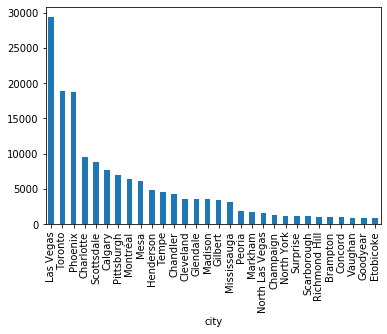

In [9]:
df_bus_groups = business.groupby('city').count()
df_bus_city = df_bus_groups['name']
df_bus_city_sorted = df_bus_city.sort_values(ascending = False)
df_bus_city_sorted[:30].plot(kind = 'bar')

# Businesses categories and their Count

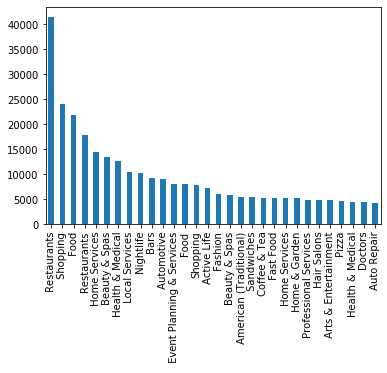

In [10]:
category_business = {}
for i in business.categories:
    cat = str(i).split(',')
    for j in cat:
        if j not in category_business.keys():
            category_business[j] = 1
        else:
            category_business[j] += 1
category_business_series = pd.Series(category_business)
category_business_series.sort_values(ascending = False, inplace = True)
category_business_series[:30].plot(kind = 'bar')

# Business and City Ordered pairs and their count

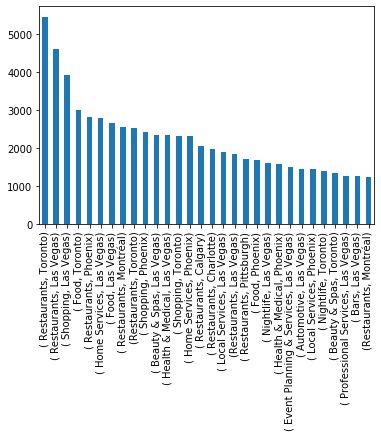

In [11]:
business_city = {}
n = len(business)
for i in range(n):
    k1 = str(business.categories.iloc[i]).split(',')
    k2 = business.city.iloc[i]
    for j in k1:
        k = (j,k2)
        if k not in business_city.keys():
            business_city[k] = 1
        else:
            business_city[k] += 1
business_city_series = pd.Series(business_city)
business_city_series.sort_values(ascending = False, inplace = True)
business_city_series[:30].plot(kind = 'bar')

# Create User data_frame

In [14]:
path = 'yelp_dataset/user.json'
user = []
with open(path) as fin:
    i = 0 
    for line in fin:
        line_contents = json.loads(line)
        user.append(line_contents)

In [15]:
user_df = pd.DataFrame(user)
user_df.to_csv('user.csv')

In [11]:
user_df=pd.read_csv('user.csv')

/home/darshan/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [16]:
user_df.head()

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,...,cool,elite,fans,friends,funny,name,review_count,useful,user_id,yelping_since
0,4.03,1,0,1,2,0,0,1,0,1,...,25,"2015,2016,2017",5,"c78V-rj8NQcQjOI8KP3UEA, alRMgPcngYSCJ5naFRBz5g...",17,Rashmi,95,84,l6BmjZMeQD3rDxWUbiAiow,2013-10-08 23:11:33
1,3.63,1,0,1,1,0,0,0,0,0,...,16,,4,"kEBTgDvFX754S68FllfCaA, aB2DynOxNOJK9st2ZeGTPg...",22,Jenna,33,48,4XChL029mKr5hydo79Ljxg,2013-02-21 22:29:06
2,3.71,0,0,0,0,0,0,1,0,0,...,10,,0,"4N-HU_T32hLENLntsNKNBg, pSY2vwWLgWfGVAAiKQzMng...",8,David,16,28,bc8C_eETBWL0olvFSJJd0w,2013-10-04 00:16:10
3,4.85,0,0,0,1,0,0,0,0,2,...,14,,5,"RZ6wS38wnlXyj-OOdTzBxA, l5jxZh1KsgI8rMunm-GN6A...",4,Angela,17,30,dD0gZpBctWGdWo9WlGuhlA,2014-05-22 15:57:30
4,4.08,80,0,80,28,1,1,16,5,57,...,665,"2015,2016,2017,2018",39,"mbwrZ-RS76V1HoJ0bF_Geg, g64lOV39xSLRZO0aQQ6DeQ...",279,Nancy,361,1114,MM4RJAeH6yuaN8oZDSt0RA,2013-10-23 07:02:50


In [12]:
user_df.columns

Index(['Unnamed: 0', 'average_stars', 'compliment_cool', 'compliment_cute',
       'compliment_funny', 'compliment_hot', 'compliment_list',
       'compliment_more', 'compliment_note', 'compliment_photos',
       'compliment_plain', 'compliment_profile', 'compliment_writer', 'cool',
       'elite', 'fans', 'friends', 'funny', 'name', 'review_count', 'useful',
       'user_id', 'yelping_since'],
      dtype='object')